In [1]:
import json
import os
import bz2
import io
from bz2 import BZ2File
import pandas as pd
import numpy as np
import re
from utils import *
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from collections import Counter
import numpy as np
import plotly as py
import plotly.figure_factory as ff

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
files_dir = "../data/impresso-data"
archives = os.listdir(files_dir)
regex='(.*19[3-9].*)'
archives = extract_particular_files(archives, regex)
id_, mag_, date_, page_, text_ =  extract_content(archives, files_dir)
df_ = pd.DataFrame.from_dict(
        {
            'mag': mag_,
            'date': date_,
            'page': page_,
            'text': text_
        })




GDL-1930.jsonl.bz2 : 32479 articles à extraire
GDL-1931.jsonl.bz2 : 33016 articles à extraire
GDL-1932.jsonl.bz2 : 32261 articles à extraire
GDL-1933.jsonl.bz2 : 31841 articles à extraire
GDL-1934.jsonl.bz2 : 33848 articles à extraire
GDL-1935.jsonl.bz2 : 31709 articles à extraire
GDL-1936.jsonl.bz2 : 15755 articles à extraire
GDL-1937.jsonl.bz2 : 32466 articles à extraire
GDL-1938.jsonl.bz2 : 30832 articles à extraire
GDL-1939.jsonl.bz2 : 29946 articles à extraire
GDL-1940.jsonl.bz2 : 26105 articles à extraire
GDL-1941.jsonl.bz2 : 26820 articles à extraire
GDL-1942.jsonl.bz2 : 28164 articles à extraire
GDL-1943.jsonl.bz2 : 30777 articles à extraire
GDL-1944.jsonl.bz2 : 34049 articles à extraire
GDL-1945.jsonl.bz2 : 33710 articles à extraire
GDL-1946.jsonl.bz2 : 40466 articles à extraire
GDL-1947.jsonl.bz2 : 41508 articles à extraire
GDL-1948.jsonl.bz2 : 40291 articles à extraire
GDL-1949.jsonl.bz2 : 38638 articles à extraire
GDL-1950.jsonl.bz2 : 38749 articles à extraire
GDL-1951.json

* Nuclear topics extraction

La premiere étape est d'identifier parmis les articles ceux en rapport a notre sujet. Pour ce faire nous avons filtrer les articles par comptage de mot clef très psécifique au sujet et étant sur d'être employé: ['nucléaire', "nucleaire", 'atomique']

In [2]:
def check_keywords(df, keywords):
    regex = re.compile("keyword_.*")
    kw_cols = list(filter(regex.match, df.columns))
    display(df[kw_cols].astype(bool).sum(axis=0))
    return df.drop(kw_cols, axis=1)
    

In [ ]:
# Keywords filtering and preprocessing
#unwanted = ['tableau hebdomadaire']
#df_ = unwanted_filtering(df_, unwanted)

keywords_nuclear =['nucléaire', "nucleaire", 'atomique']
df_nuclear = keywords_filtering(df_, keywords_nuclear)
df_nuclear = preprocessing('only_nuclear', df_nuclear)
df_nuclear = keywords_filtering(df_nuclear, keywords_nuclear)

#Preprocess dates
df_nuclear.sort_values(by='date', inplace=True)
df_nuclear['date'] =  pd.to_datetime(df_nuclear['date'], format='%Y-%m-%d')

display(df_nuclear.head())
display(df_nuclear.dtypes)
display(df_nuclear.shape)

In [5]:
#df_nuclear.to_csv("data/nuclear_data.csv")
df_nuclear = pd.read_csv("data/nuclear_data.csv")
df_nuclear.drop("Unnamed: 0", axis=1)
display(df_nuclear.head())
display(df_nuclear.dtypes)
display(df_nuclear.shape)

unwanted = ['tableau hebdomadaire']
df_nuclear = unwanted_filtering(df_nuclear, unwanted)
keywords_nuclear =['nucléaire', "nucleaire", 'atomique']
df_nuclear = keywords_filtering(df_nuclear, keywords_nuclear)
df_nuclear = check_keywords(df_nuclear, keywords_nuclear)
display(df_nuclear.head())
display(df_nuclear.dtypes)
display(df_nuclear.shape)

,Unnamed: 0,mag,date,page,ppage,text,length
0,4637,GDL,1930-01-11,4,NaN,Un problème de circulation LES ACTUALITÉS MÉDICALES Nous empruntons au journal « Le Tempe » cett...,15508
1,3993,GDL,1930-01-23,3,NaN,Paternité et empreintes digitales Deux médecins allemands appartenant tous deux à l'Institut ana...,1680
2,5123,GDL,1930-01-25,3,NaN,Conseils aux lymphatiques QUESTIONS D'HYGIÈNE La lymphe est appelée le sang blanc. Elle circule ...,6472
3,30551,GDL,1930-02-05,3,NaN,LE SOLEIL ENSEVELI FEUILLETON DE LA 7 « GAZETTE DE LAUSANNE » Noëlle Roger Alors je vis Kerluoe ...,7557
4,3101087,JDG,1930-02-19,2,NaN,FEUILLETON DU JOURNAL DE GENEVE Les problèmes de la vie Y a-t-il une crise du transformisme ? La...,7113


Unnamed: 0      int64
mag            object
date           object
page            int64
ppage         float64
text           object
length          int64
dtype: object

(71713, 7)

=====UNWANTED====


'After keyword filtered: '

(71712, 7)

===KEYWORDS===


'After keyword filtered: '

(71712, 11)

keyword_nucléaire    51661
keyword_nucleaire      576
keyword_atomique     33505
dtype: int64

,Unnamed: 0,mag,date,page,ppage,text,length,keywords
0,4637,GDL,1930-01-11,4,NaN,Un problème de circulation LES ACTUALITÉS MÉDICALES Nous empruntons au journal « Le Tempe » cett...,15508,1
1,3993,GDL,1930-01-23,3,NaN,Paternité et empreintes digitales Deux médecins allemands appartenant tous deux à l'Institut ana...,1680,1
2,5123,GDL,1930-01-25,3,NaN,Conseils aux lymphatiques QUESTIONS D'HYGIÈNE La lymphe est appelée le sang blanc. Elle circule ...,6472,2
3,30551,GDL,1930-02-05,3,NaN,LE SOLEIL ENSEVELI FEUILLETON DE LA 7 « GAZETTE DE LAUSANNE » Noëlle Roger Alors je vis Kerluoe ...,7557,1
4,3101087,JDG,1930-02-19,2,NaN,FEUILLETON DU JOURNAL DE GENEVE Les problèmes de la vie Y a-t-il une crise du transformisme ? La...,7113,1


Unnamed: 0      int64
mag            object
date           object
page            int64
ppage         float64
text           object
length          int64
keywords        int64
dtype: object

(71712, 8)

* Separate civil from militaire

Maintenant nous pouvons séparer par une deuxieme étape de filtrage un corpus rassemblant les articles du nucléaire civile, du nucléaire militaire et enfin ceux qui traite les deux. Ces derniers peuvent arrivé souvent lorsque des questions sur l'un impacte l'autre.

In [6]:
# Select civil from nuclear 
keywords_civil = ['energie atomique', 'énergie atomique', 'énergie nucléaire', 'centrale']
df_civil = keywords_filtering(df_nuclear, keywords_civil)
df_civil = check_keywords(df_civil, keywords_civil)
display(df_civil.head())
display(df_civil.dtypes)
display(df_civil.shape)
#df_civil.to_csv("data/nuclear_civil_data.csv")

===KEYWORDS===


'After keyword filtered: '

(25549, 12)

keyword_energie atomique       692
keyword_énergie atomique      8409
keyword_énergie nucléaire     6027
keyword_centrale             16492
dtype: int64

,Unnamed: 0,mag,date,page,ppage,text,length,keywords
9,3070497,JDG,1930-03-08,4,NaN,CONFÉDÉRATION Pour l'humanité souffrante. — Récemment la Société de secours de Winterthoirri la ...,2841,1
24,3079468,JDG,1930-12-17,4,NaN,"LES CONFÉRENCES Les conférences de l'Aula Le Sinanthroous Dans le numéro de samedi écoulé, M. le...",7145,1
41,3102657,JDG,1931-07-06,3,NaN,"Université Durant le semestre d'été, l'Institut de physique a tenu régulièrement ses « Colloques...",1674,1
47,49075,GDL,1931-08-07,1,NaN,"Le nouvel Institut de biologie physico-chimique de Parts Rue Pierre-Curie, face aux Instituts du...",8604,1
53,3124742,JDG,1931-11-06,6,NaN,LES CONFERENCES Le sentiment religieux Comme suite à l'enquête de M. Pierre Bovet sur le sentime...,928,1


Unnamed: 0      int64
mag            object
date           object
page            int64
ppage         float64
text           object
length          int64
keywords        int64
dtype: object

(25549, 8)

In [7]:
# Select military from nuclear 
keywords_militaire = ['arme', 'bombe', 'guerre atomique', 'guerre nucléaire']
df_militaire = keywords_filtering(df_nuclear, keywords_militaire)
df_militaire = check_keywords(df_militaire, keywords_militaire)
display(df_militaire.head())
display(df_militaire.dtypes)
display(df_militaire.shape)
#df_militaire.to_csv("data/nuclear_militaire_data.csv")


===KEYWORDS===


'After keyword filtered: '

(31461, 16)

keyword_energie atomique       206
keyword_énergie atomique      2705
keyword_énergie nucléaire     1106
keyword_centrale              3336
keyword_arme                 26249
keyword_bombe                 9463
keyword_guerre atomique       1065
keyword_guerre nucléaire      1229
dtype: int64

,Unnamed: 0,mag,date,page,ppage,text,length,keywords
3,30551,GDL,1930-02-05,3,NaN,LE SOLEIL ENSEVELI FEUILLETON DE LA 7 « GAZETTE DE LAUSANNE » Noëlle Roger Alors je vis Kerluoe ...,7557,1
37,51789,GDL,1931-06-07,1,NaN,"Chronique scientifique f par Alphonse BERNOUD je pi Le bombardement cosmique Jour et nuit, l'ann...",10875,1
52,3129216,JDG,1931-10-28,4,NaN,La vie d'un savant « John Briquet Le Journal de Genève a déjà annoncé le décès de John Briquet e...,11709,1
54,56302,GDL,1931-11-15,4,NaN,"Echos scientifiques Un drame cosmique Sir Arthur Eddington, président de la Société de physique ...",6292,3
63,69919,GDL,1932-01-25,3,NaN,"Les conférence * académiques Conférence du Dr E. Rist Le grincement de dents cher, les malades à...",4514,1


Unnamed: 0      int64
mag            object
date           object
page            int64
ppage         float64
text           object
length          int64
keywords        int64
dtype: object

(31461, 8)

In [27]:
df_both = df_militaire[df_militaire.isin(df_civil)].dropna()
df_both
display(df_both.head())
display(df_both.dtypes)
display(df_both.shape)
#df_both.to_csv("data/nuclear_both_data.csv")
df_both[df_both['mag']== 'JDG'].shape

,Unnamed: 0,mag,date,page,ppage,text,length,keywords
27195,4262802.0,JDG,1965-12-13,1.0,5.0,Les constr-ucteuredu « Concorde » craignent les radiations Les avions de transport civils supers...,7021.0,1.0
35928,4607427.0,JDG,1973-09-27,1.0,3.0,Le Traité de non-prolifération réveille M. Franz-Josef Strauss De Bonn : Jiïrg Bissegger Signé e...,4351.0,2.0
37082,4677679.0,JDG,1974-10-21,1.0,5.0,Les Arabes se sentent calomniés « GUERRE DU PÉTROLE » De Beyrouth : Edouard Saab Les milieux pol...,4440.0,1.0
38144,4713278.0,JDG,1975-09-02,1.0,7.0,Paris pense ce régions » il oublie les peuples ! DE LA BRETAGNE A LA CORSE De Paris : Thierry Pf...,4902.0,1.0
39180,4757145.0,JDG,1976-09-16,1.0,3.0,LES ÉTATS-UNIS DEVANT LA PROLIFÉRATION NUCLÉAIRE (III) L'impasse de la persuasion ... et celle d...,5134.0,2.0


Unnamed: 0    float64
mag            object
date           object
page          float64
ppage         float64
text           object
length        float64
keywords      float64
dtype: object

(14, 8)

(14, 8)

In [9]:
#Check shapes for interception articles
display(keywords_filtering(df_nuclear, keywords_civil + keywords_militaire).head(2))

===KEYWORDS===


'After keyword filtered: '

(50779, 16)

,Unnamed: 0,mag,date,page,ppage,text,length,keywords,keyword_energie atomique,keyword_énergie atomique,keyword_énergie nucléaire,keyword_centrale,keyword_arme,keyword_bombe,keyword_guerre atomique,keyword_guerre nucléaire
3,30551,GDL,1930-02-05,3,NaN,LE SOLEIL ENSEVELI FEUILLETON DE LA 7 « GAZETTE DE LAUSANNE » Noëlle Roger Alors je vis Kerluoe ...,7557,1,0,0,0,0,1,0,0,0
9,3070497,JDG,1930-03-08,4,NaN,CONFÉDÉRATION Pour l'humanité souffrante. — Récemment la Société de secours de Winterthoirri la ...,2841,1,0,0,0,1,0,0,0,0


Le nucléaire militaire est globalement plus traité que le nucléaire civile. Nous remarquons 14 articles traitant à la fois du civile et du militaire.
- 72k articles pour le nucléaire
- 26k nucléaire civile
- 31k nucléaire militaire
- 14 articles deux domaines


* Plot the count evolution of article along the time

Nous pouvons facilement afficher l'evolution du nombre d'article concernant le nucléaire au cours du temps. Nous allons également le faire plus précisment sur les corpus du nucléair et du civle. Finalement la séparation entre les journaux peut petre interessant.

In [10]:
def plots_on_key_func(key, func, name):
    #Count nucleair, civil, militaire
    plt.figure(figsize=(16, 6))
    plt.title(name + "du nombre d'article par jour")
    plt.plot(df_nuclear.groupby('date')[['text']].apply(func), label='nucléaire')
    plt.plot(df_civil.groupby('date')[['text']].apply(func), label='civile')
    plt.plot(df_militaire.groupby('date')[['text']].apply(func), label='militaire')
    plt.legend()
    plt.show()
    
    # Par journal: Journal de geneve & Gazette de Lausanne
    plt.figure(figsize=(16, 6))
    plt.title(name + "du nombre d'article par jour par corpus pour JDL")
    plt.plot(df_nuclear[df_nuclear['mag'] == 'JDG'].groupby('date').apply(func), style='-', label='nucléaire JDG')
    plt.plot(df_civil[df_civil['mag'] == 'JDG'].groupby('date').apply(func), style='-', label='civile JDG')
    plt.plot(df_militaire[df_militaire['mag'] == 'JDG'].groupby('date').apply(func), style='-', label='militaire JDG')

    plt.title(name + "du nombre d'article par jour par corpus pour GDL")
    plt.plot(df_nuclear[df_nuclear['mag'] == 'GDL'].groupby('date').apply(func), style='--', label='nucléaire GDL')
    plt.plot(df_civil[df_civil['mag'] == 'GDL'].groupby('date').apply(func), style='--', label='civile GDL')
    plt.plot(df_militaire[df_militaire['mag'] == 'GDL'].groupby('date').apply(func), style='--', label='nucl"aire GDL')
    plt.legend()

    plt.show()

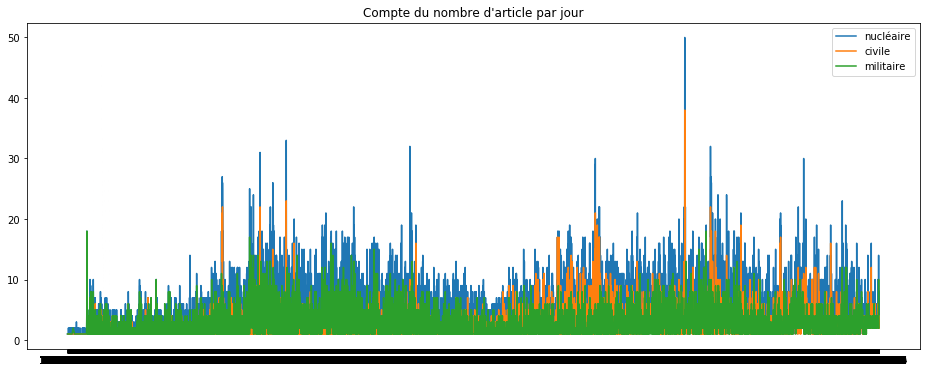

In [11]:
#Compte du nombre d'articles par jour
plt.figure(figsize=(16, 6))
plt.title("Compte du nombre d'article par jour")
plt.plot(df_nuclear.groupby('date')[['text']].count(), label='nucléaire')
plt.plot(df_civil.groupby('date')[['text']].count(), label='civile')
plt.plot(df_militaire.groupby('date')[['text']].count(), label='militaire')
plt.legend()
plt.show()


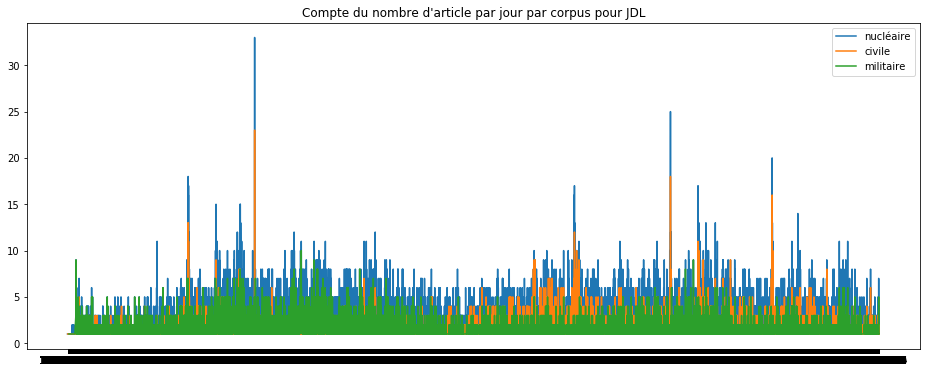

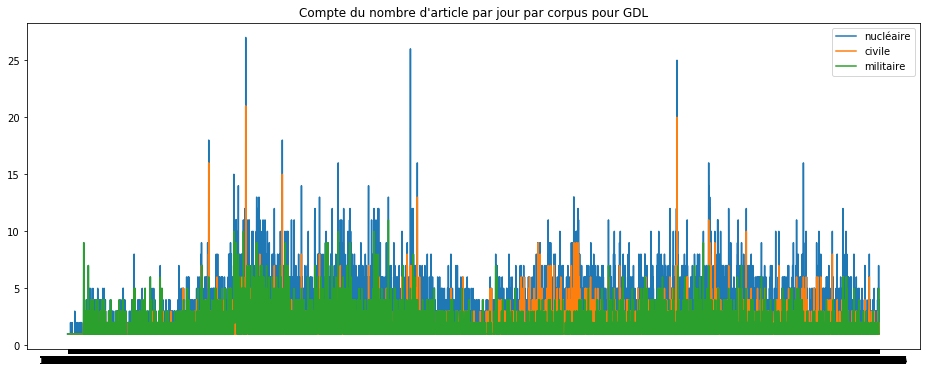

In [12]:
# Par journal: Journal de geneve & Gazette de Lausanne
plt.figure(figsize=(16, 6))
plt.title("Compte du nombre d'article par jour par corpus pour JDL")
plt.plot(df_nuclear[df_nuclear['mag'] == 'JDG'].groupby('date')[['text']].count(), label='nucléaire')
plt.plot(df_civil[df_civil['mag'] == 'JDG'].groupby('date')[['text']].count(), label='civile')
plt.plot(df_militaire[df_militaire['mag'] == 'JDG'].groupby('date')[['text']].count(), label='militaire')
plt.legend()

plt.show()

plt.figure(figsize=(16, 6))
plt.title("Compte du nombre d'article par jour par corpus pour GDL")
plt.plot(df_nuclear[df_nuclear['mag'] == 'GDL'].groupby('date')[['text']].count(), label='nucléaire')
plt.plot(df_civil[df_civil['mag'] == 'GDL'].groupby('date')[['text']].count(), label='civile')
plt.plot(df_militaire[df_militaire['mag'] == 'GDL'].groupby('date')[['text']].count(), label='militaire')
plt.legend()

plt.show()

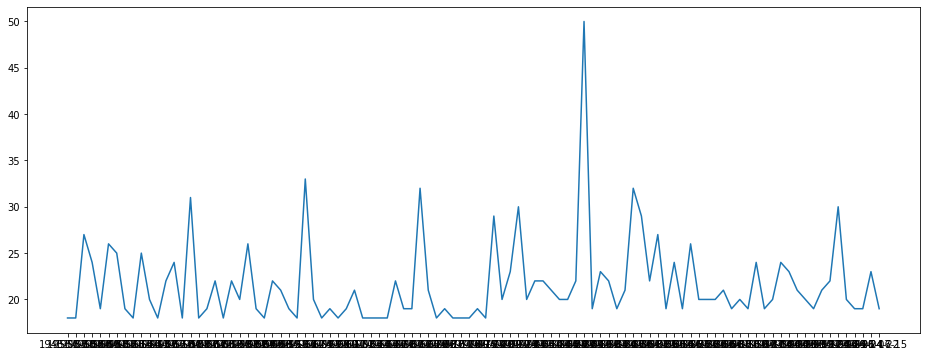

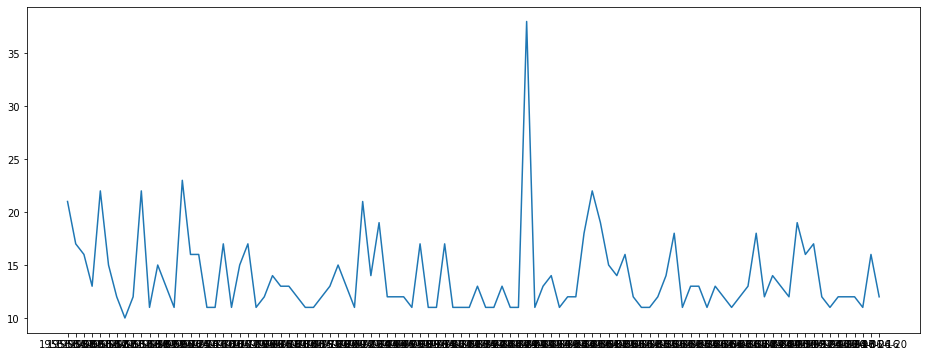

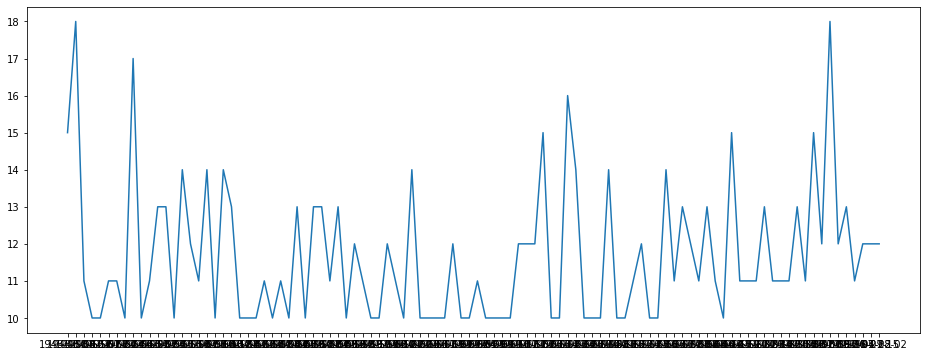

In [20]:
# Plot des 100 jours avec le plus d'articles
plt.figure(figsize=(16, 6))
plt.plot(df_nuclear.groupby('date')[['text']].count().nlargest(100, columns='text').sort_index(), label='nucléaire')
plt.show()
plt.figure(figsize=(16, 6))

plt.plot(df_civil.groupby('date')[['text']].count().nlargest(100, columns='text').sort_index(), label='civile')
plt.show()
plt.figure(figsize=(16, 6))
plt.plot(df_militaire.groupby('date')[['text']].count().nlargest(100, columns='text').sort_index(), label='militaire')
plt.show()

In [14]:
display(df_nuclear.groupby('date')[['text']].count().describe())
display(df_civil.groupby('date')[['text']].count().describe())
display(df_militaire.groupby('date')[['text']].count().describe())

,text
count,14928.000000
mean,4.803859
std,3.561626
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,50.000000


,text
count,9864.000000
mean,2.590126
std,2.084883
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,38.000000


,text
count,11181.000000
mean,2.813791
std,1.990638
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,18.000000


* Plot pages importance 

Nous pouvons également afficher la proportion de première/deuxième page des articles. En effet la présence d'article à cette position est signe de l'importance de l'évènement ou du sujet traité.


In [ ]:
#Moyenne de la position 
plt.figure(figsize=(16, 6))
plt.title("Moyenne de la position des articles par jour ")
plt.plot(df_nuclear.groupby('date')[['page']].mean(), label='nucléaire')
plt.plot(df_civil.groupby('date')[['page']].mean(), label='civile')
plt.plot(df_militaire.groupby('date')[['page']].mean(), label='militaire')
plt.legend()
plt.show()



In [ ]:
#Nombre d'article en tête d'affiche de la position 
plt.figure(figsize=(16, 6))
plt.title("Moyenne de la position des articles par jour ")
temp_nuclear = df_nuclear[df_nuclear['page'] > 2]
temp_civil = df_nuclear[df_nuclear['page'] > 2]

temp_militaire = df_nuclear[df_nuclear['page'] > 2]

plt.plot(df_nuclear.groupby('date')[['page']].agg(lambda x: x if x < 3, axis=0).count(), label='nucléaire')
plt.plot(df_civil.groupby('date')[['page']].agg(lambda x: x if x < 3, axis=0).count(), label='civile')
plt.plot(df_militaire.groupby('date')[['page']].agg(lambda x: x if x < 3, axis=0).count(), label='militaire')
plt.legend()
plt.show()



* Plot the info about the length of articles

Nous pouvons afficher la taille moyenne des articles par jour. Nous pouvons aussi regarde si la longueur des articles chnage au cours du temps.

In [ ]:
#Moyenne de la taille
plt.figure(figsize=(16, 6))
plt.title("Moyenne de la taille des articles par jour ")
plt.plot(df_nuclear.groupby('date')[['length']].mean(), label='nucléaire')
plt.plot(df_civil.groupby('date')[['length']].mean(), label='civile')
plt.plot(df_militaire.groupby('date')[['length']].mean(), label='militaire')
plt.legend()
plt.show()


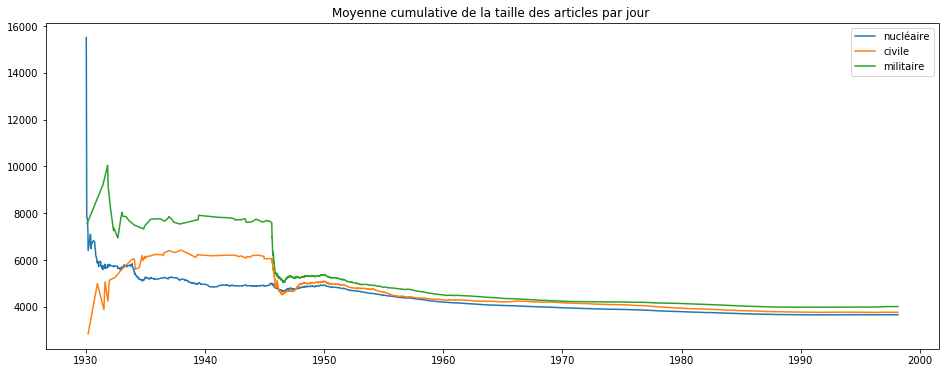

In [74]:
#Moyenne cumulative de la taille
plt.figure(figsize=(16, 6))
plt.title("Moyenne cumulative de la taille des articles par jour ")
plt.plot(df_nuclear.groupby('date')[['length']].mean().expanding().mean(), label='nucléaire')
plt.plot(df_civil.groupby('date')[['length']].mean().expanding().mean(), label='civile')
plt.plot(df_militaire.groupby('date')[['length']].mean().expanding().mean(), label='militaire')
plt.legend()
plt.show()


* Select important dates and analyse

De ces différents graphes nous pouvons à présent nous concertrer sur les évènements les plus importants et avoir une variance prise depuis nos résultat

In [34]:
#Afficher les 10 jours par domaines correspond au nopmbre d'article le plus grand
display(df_nuclear.groupby('date')[['text']].count().nlargest(10, columns='text').sort_index())
display(df_civil.groupby('date')[['text']].count().nlargest(10, columns='text').sort_index())
display(df_militaire.groupby('date')[['text']].count().nlargest(10, columns='text').sort_index())

,text
date,
1955-08-08,27
1957-11-28,31
1959-06-24,33
1966-12-29,32
1979-02-09,29
1979-02-14,30
1984-09-11,50
1986-05-01,32
1986-05-02,29


,text
date,
1955-08-08,21
1955-08-12,22
1957-11-28,22
1959-06-24,23
1979-02-14,21
1979-04-03,19
1984-09-11,38
1986-05-01,22
1986-05-02,19


,text
date,
1945-08-09,15
1945-08-10,18
1957-04-13,17
1957-05-18,14
1957-07-06,14
1962-03-13,15
1962-03-24,16
1964-10-19,15
1985-08-06,15


Depuis ce table nous pouvons récupérer les dates importantes. Le nombre d'occurence des articles, leur position dans le journal ainsi que sa longueur sont des indicateurs de l'importance de l'article.

In [37]:
#Utils
events_militaire ={"ww2": ('1939-01-01', '1945-01-01'),
                    "cuba": ('1962-01-01', '1962-12-01')}
events_civils = {"lucens": ('1939-01-01', '1945-01-01'),
                "lucens": ('1986-01-01', '1987-01-01'),
                "lucens": ('1939-01-01', '1945-01-01'),}

def select_dates(df, start, end):
    res = df.copy().reset_index()
    res =  res[(res['date'] >= start) & (res['date'] < end)]
    return res.set_index('date')

In [38]:
display(select_dates(df_militaire, start=events_militaire['ww2'][0], end=events_militaire['ww2'][0]).head())


,index,Unnamed: 0,mag,page,ppage,text,length,keywords
date,,,,,,,,


* Dendogramme


In [ ]:
stopwords = nltk.corpus.stopwords.words('french')
# additional stopwords to be removed manually.
#file = open('Corpus.txt', 'r')
#moreStopwords = file.read().splitlines()
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

#data = PyPDF4.PdfFileReader(open('ReadyPlayerOne.pdf', 'rb'))
pageData = ' '.join(df_both["text"])
#for page in data.pages:
#pageData += page.extractText()


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenize = re.split("\W+", text)
    text = [wn.lemmatize(word) for word in tokenize if word not in stopwords]
    #final = [word for word in text if word not in moreStopwords]
    # Accessing wordnet synset corpora to find the meaning of the words.
    # lemmas = []
    # for token in final:
    #     lemmas += [synset.lemmas()[0].name() for synset in wordnet.synsets(token)]
    # return list(set(lemmas))  # returns unique words
    # return list(lemmas)
    return text #final


# get most common words & plot them on bar graph
filter_data = clean_text(pageData)
most_common_words = [word for word, word_count in Counter(filter_data).most_common(25)]


# Creating Dendogram
X = np.random.rand(25, 25)
fig = ff.create_dendrogram(X, orientation='bottom', 
labels=most_common_words)
fig['layout'].update({'width': 800, 'height': 800})
py.offline.plot(fig, filename='dendrogram_with_labels')

* Create iramutek files

In [11]:
creating_iramutek_file(df_all_, "../data/iramutek/corpus_all" + date +".txt")
creating_iramutek_file(df_jdg_, "../data/iramutek/corpus_jdg" + date +".txt")
creating_iramutek_file(df_gdl_, "../data/iramutek/corpus_gdl" + date +".txt")